# Notebook to recreate the plots for the Report

The notebook allows to recreate the plots for the report. The plots were done using the **Weights and Biases** tool. 
<br>
In order to recreate the plots it is also possible to run the `train.py` script and connect it to wandb and download the data from there.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Main results plot

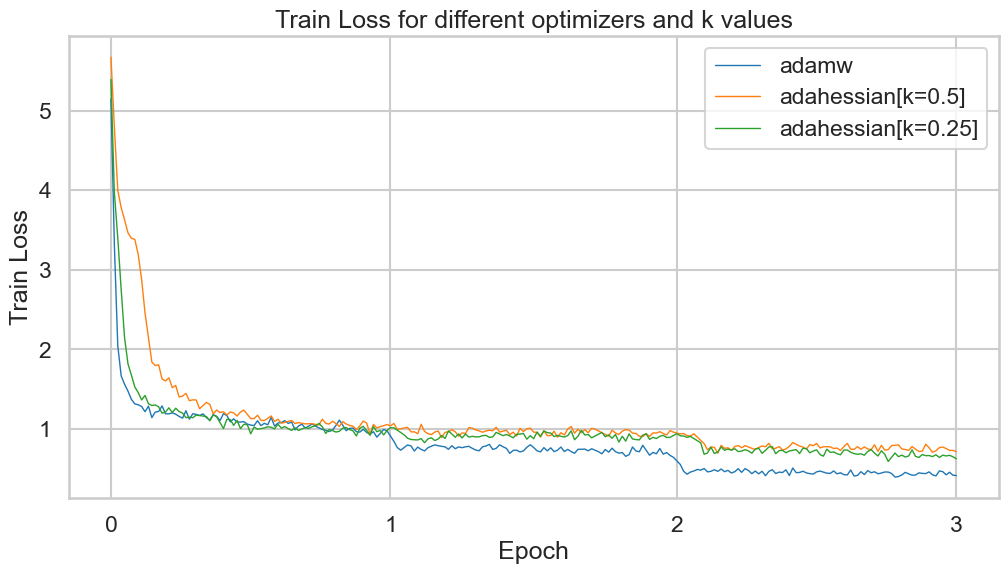

In [4]:
df = pd.read_csv('data_plots/main_results.csv')
df['epoch'] = df.index / 82

sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))
plt.plot(df['adamw'], label='adamw', linewidth=1) 
plt.plot(df['adahessian[k=0.5]'], label='adahessian[k=0.5]', linewidth=1)
plt.plot(df['adahessian[k=0.25]'], label='adahessian[k=0.25]', linewidth=1)
plt.legend()
plt.xlabel('Epoch')
plt.xticks([0, 82, 166, 248], ['0', '1', '2', '3'])
plt.ylabel('Train Loss')
plt.title('Train Loss for different optimizers and k values')
plt.show()


# Memory allocated

The data were taken from weights and biases. From the below image it can bes seen the original plot.<br> <br>
<img src="data_plots/memory_allocated.png" width="40%" alt="Memory Allocated">


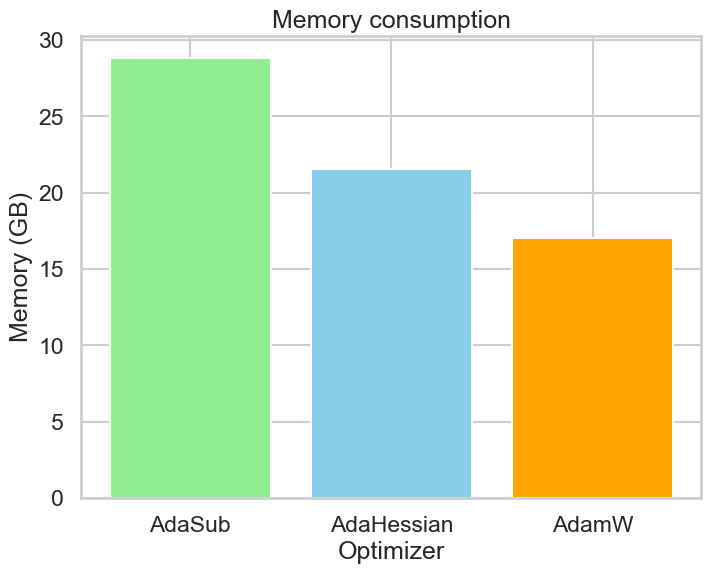

In [9]:
memory = [30936836778, 23145086976, 18294374400, ]
memory = [x / 1024 / 1024 / 1024 for x in memory]
df = pd.DataFrame(memory, columns=['Memory'], index=['AdaSub', 'AdaHessian', 'AdamW'])

sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['Memory'], color=['lightgreen', 'skyblue', 'orange'])
plt.xlabel('Optimizer')
plt.ylabel('Memory (GB)')
plt.title('Memory consumption')
plt.show()

# Grid search

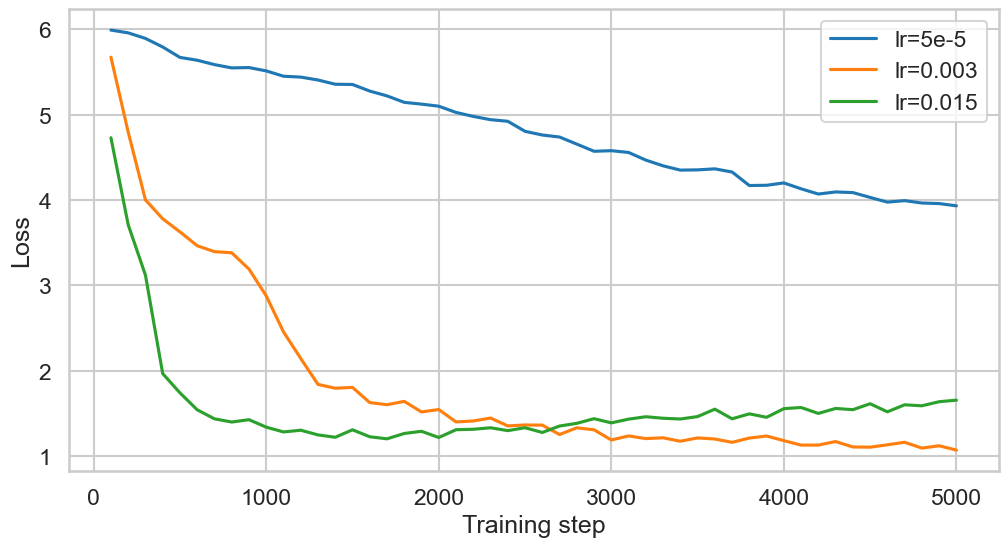

In [11]:
data = pd.read_csv('data_plots/k0.5_comparison.csv')
lowest = data.iloc[:, 1][:50]
highest = data.iloc[:, 4][:50]
optimal = data.iloc[:, 7][:50]
sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))

# Plotting the graphs
plt.plot(np.arange(1, 51)*100, lowest, label='lr=5e-5')
plt.plot(np.arange(1, 51)*100, optimal, label='lr=0.003')
plt.plot(np.arange(1, 51)*100, highest, label='lr=0.015')

# Adding labels and title
plt.xlabel('Training step')
plt.ylabel('Loss')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

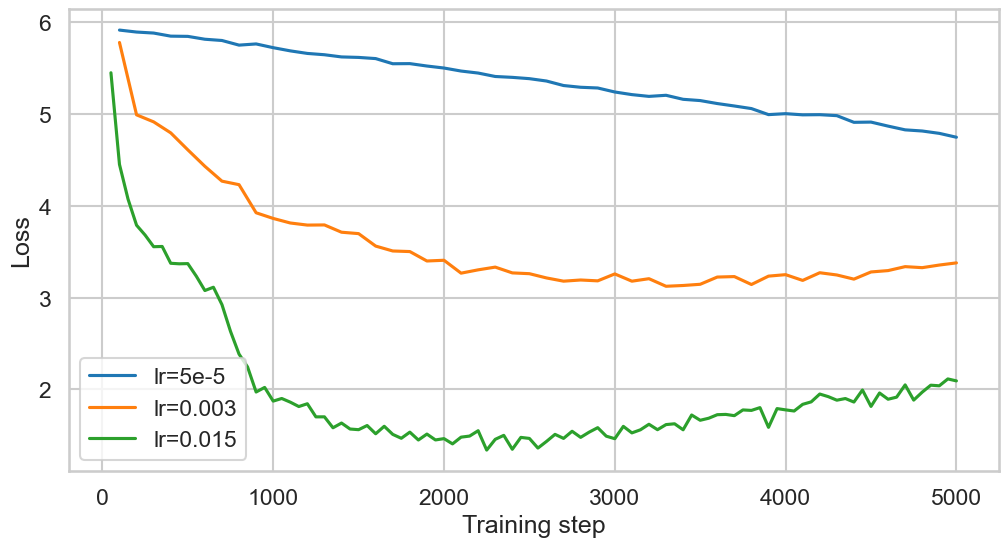

In [12]:
data = pd.read_csv('data_plots/k1_comparison.csv')
lowest = data.iloc[:, 1].dropna()[:50]
optimal = data.iloc[:, 4].dropna()[:50]
highest = data.iloc[:, 7].dropna()[:100]

sns.set_style("whitegrid")
sns.set_context("talk")
plt.figure(figsize=(12, 6))

# Plotting the graphs
plt.plot(np.arange(1, 51)*100, lowest, label='lr=5e-5')
plt.plot(np.arange(1, 51)*100, optimal, label='lr=0.003')
plt.plot(np.arange(1, 101)*50, highest, label='lr=0.015')

# Adding labels and title
plt.xlabel('Training step')
plt.ylabel('Loss')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()